# **Final Project Pembelajaran Mesin**

## **Anggota Kelompok**


1. **Ligar Arsa Arnata // 5025211244**
2. **Mohammad Kamal Nawaf** //
3. **Muhammad Zhafran // 5025211100**
4. **Muhammad Naufal Fawwaz Ramadhan** //

## **Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV

## **Scenario 1**

### **Data Preprocessing**

In [ ]:
# Load Dataset
df = pd.read_csv('/content/HargaRumahJaksel.csv', delimiter=';')
df.head()


,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28.000.000.000,1100,700,5,6,ADA,JAKSEL
1,19.000.000.000,824,800,4,4,ADA,JAKSEL
2,4.700.000.000,500,400,4,3,ADA,JAKSEL
3,4.900.000.000,251,300,5,4,ADA,JAKSEL
4,28.000.000.000,1340,575,4,5,ADA,JAKSEL


In [ ]:
# Change column headings
df.rename(columns={
    'HARGA': 'Harga',
    'LT': 'Luas Tanah',
    'LB': 'Luas Bangunan',
    'GRS': 'Garasi',
    'JKT': 'Jumlah Kamar Tidur',
    'JKM': 'Jumlah Kamar Mandi',
    'KOTA': 'Kota'
}, inplace=True)
df.head()

,Harga,Luas Tanah,Luas Bangunan,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Garasi,Kota
0,28.000.000.000,1100,700,5,6,ADA,JAKSEL
1,19.000.000.000,824,800,4,4,ADA,JAKSEL
2,4.700.000.000,500,400,4,3,ADA,JAKSEL
3,4.900.000.000,251,300,5,4,ADA,JAKSEL
4,28.000.000.000,1340,575,4,5,ADA,JAKSEL


In [ ]:
# Checking data type each column
data_types = df.dtypes
data_types

Harga                 object
Luas Tanah             int64
Luas Bangunan          int64
Jumlah Kamar Tidur     int64
Jumlah Kamar Mandi     int64
Garasi                object
Kota                  object
dtype: object

In [ ]:
# Drop 'Kota' column
df_cleaned = df.drop(columns=['Kota'])

# Change 'Harga' type to integer
df_cleaned['Harga'] = df_cleaned['Harga'].str.replace('.', '').astype('int64')


# Change 'Garasi' type to numerical (1 for 'ADA' and 0 for 'TIDAK ADA')
df_cleaned['Garasi'] = df_cleaned['Garasi'].apply(lambda x: 1 if x == 'ADA' else 0)


df_cleaned.head()

,Harga,Luas Tanah,Luas Bangunan,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Garasi
0,28000000000,1100,700,5,6,1
1,19000000000,824,800,4,4,1
2,4700000000,500,400,4,3,1
3,4900000000,251,300,5,4,1
4,28000000000,1340,575,4,5,1


In [ ]:
# Checking data type each column after cleaned
data_types = df_cleaned.dtypes
data_types

Harga                 int64
Luas Tanah            int64
Luas Bangunan         int64
Jumlah Kamar Tidur    int64
Jumlah Kamar Mandi    int64
Garasi                int64
dtype: object

In [ ]:
# Check for null values in each column
null_values = df_cleaned.isnull().sum()
null_values

Harga                 0
Luas Tanah            0
Luas Bangunan         0
Jumlah Kamar Tidur    0
Jumlah Kamar Mandi    0
Garasi                0
dtype: int64

In [ ]:
# Check total data
total_entries = df_cleaned.shape[0]

total_entries

1001

In [ ]:
# Split the dataset into training and testing sets with a ratio of 4:1
train_df, test_df = train_test_split(df_cleaned, test_size=0.2, random_state=42)

# Reset index for both training and testing data
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# Display the shapes of the resulting datasets
train_shape = train_df.shape
test_shape = test_df.shape

train_shape, test_shape

((800, 6), (201, 6))

In [ ]:
# Display Train Dataset
train_df.head()

,Harga,Luas Tanah,Luas Bangunan,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Garasi
0,19000000000,358,500,4,5,1
1,4750000000,161,250,4,2,0
2,26000000000,600,450,4,4,1
3,7700000000,188,300,3,3,1
4,5800000000,144,325,3,3,1


In [ ]:
# Display Test Dataset
test_df.head()

,Harga,Luas Tanah,Luas Bangunan,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Garasi
0,21000000000,817,500,4,3,0
1,7000000000,200,300,3,3,0
2,15000000000,520,500,4,4,1
3,25000000000,674,500,5,4,1
4,7500000000,259,410,4,3,1


### **Linear Regression**

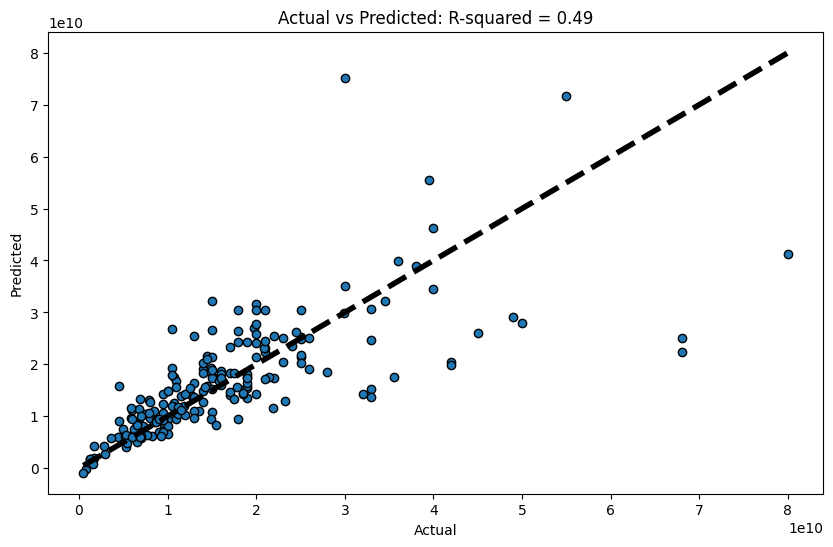

,Metric,Linear Regression
0,R-squared,4.850534e-01
1,MAE,4.993783e+09


In [ ]:
# Memisahkan fitur dan target
X_train = train_df.drop(columns=['Harga'])
y_train = train_df['Harga']
X_test = test_df.drop(columns=['Harga'])
y_test = test_df['Harga']

# Melatih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Memprediksi nilai harga rumah menggunakan data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Visualisasi R-squared
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted: R-squared = {:.2f}'.format(r_squared))

plt.show()

# Membuat DataFrame untuk hasil metrik evaluasi
results_dt = pd.DataFrame({
    'Metric': ['R-squared', 'MAE'],
    'Linear Regression': [r_squared, mae]
})


results_dt

### **Desicion Tree Regressor**

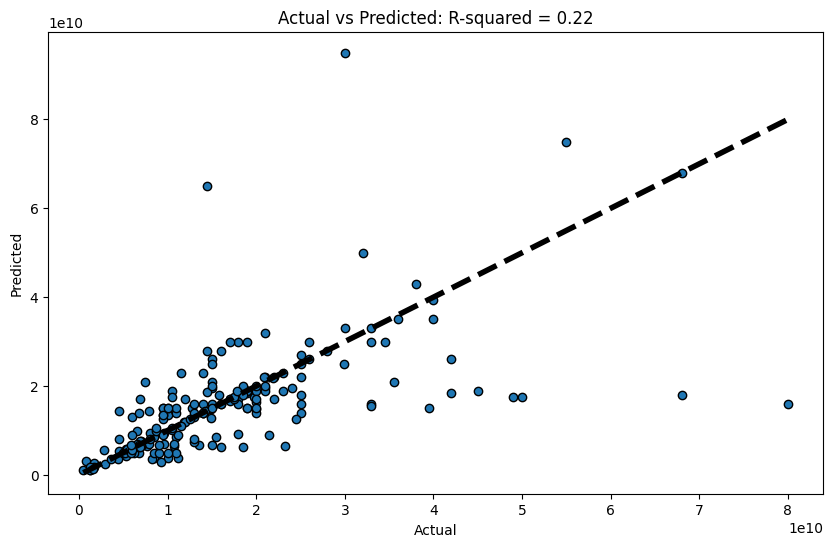

,Metric,Decision Tree Regressor
0,R-squared,2.158340e-01
1,MAE,5.330448e+09


In [ ]:
# Memisahkan fitur dan target
X_train = train_df.drop(columns=['Harga'])
y_train = train_df['Harga']
X_test = test_df.drop(columns=['Harga'])
y_test = test_df['Harga']

# Melatih model Decision Tree Regressor dengan data yang belum dinormalisasi
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Memprediksi nilai harga rumah menggunakan data uji yang belum dinormalisasi
y_pred_dt = dt_regressor.predict(X_test)

# Menghitung metrik evaluasi tanpa klasifikasi
r_squared_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Visualisasi R-squared
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted: R-squared = {:.2f}'.format(r_squared_dt))

plt.show()

# Membuat DataFrame untuk hasil metrik evaluasi
results_dt_regressor = pd.DataFrame({
    'Metric': ['R-squared', 'MAE'],
    'Decision Tree Regressor': [r_squared_dt, mae_dt]
})

results_dt_regressor

### **Random Forest Regressor**

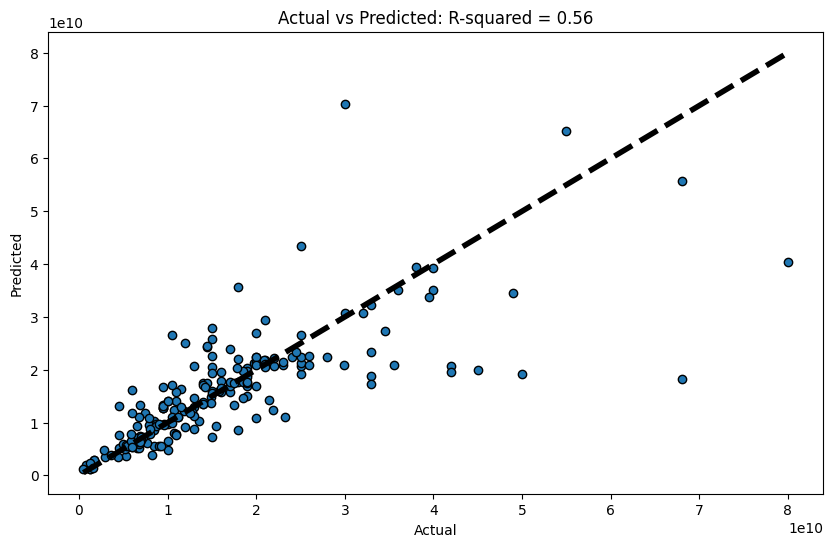

,Metric,Random Forest Regressor
0,R-squared,5.602155e-01
1,MAE,4.305332e+09


In [ ]:
# Memisahkan fitur dan target
X_train = train_df.drop(columns=['Harga'])
y_train = train_df['Harga']
X_test = test_df.drop(columns=['Harga'])
y_test = test_df['Harga']

# Melatih model Random Forest Regressor dengan data yang belum dinormalisasi
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Memprediksi nilai harga rumah menggunakan data uji yang belum dinormalisasi
y_pred_rf = rf_regressor.predict(X_test)

# Menghitung metrik evaluasi tanpa klasifikasi
r_squared_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Visualisasi R-squared
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted: R-squared = {:.2f}'.format(r_squared_rf))

plt.show()

# Membuat DataFrame untuk hasil metrik evaluasi
results_rf_regressor = pd.DataFrame({
    'Metric': ['R-squared', 'MAE'],
    'Random Forest Regressor': [r_squared_rf, mae_rf]
})

results_rf_regressor

### **KNN Regressor**

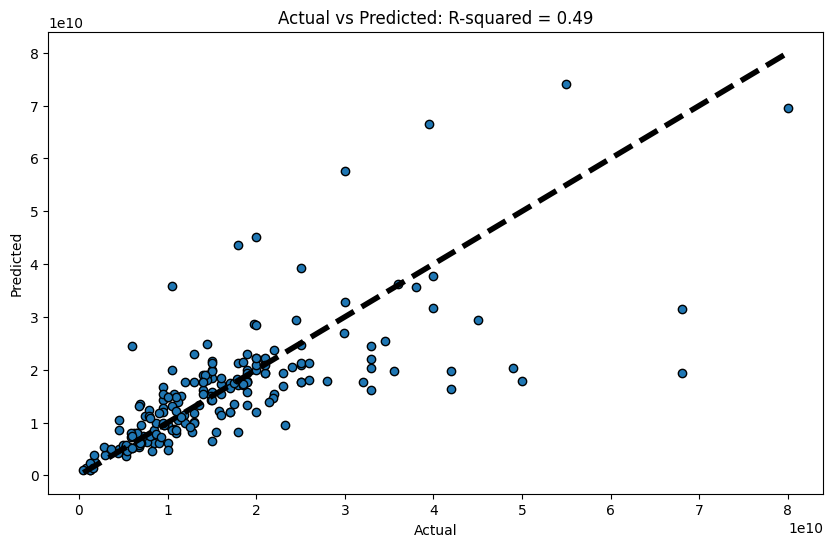

,Metric,KNN Regressor
0,R-squared,4.874490e-01
1,MAE,5.029592e+09


In [ ]:
# Memisahkan fitur dan target
X_train = train_df.drop(columns=['Harga'])
y_train = train_df['Harga']
X_test = test_df.drop(columns=['Harga'])
y_test = test_df['Harga']

# Melatih model KNN Regressor dengan data yang belum dinormalisasi
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Memprediksi nilai harga rumah menggunakan data uji yang belum dinormalisasi
y_pred_knn = knn_regressor.predict(X_test)

# Menghitung metrik evaluasi tanpa klasifikasiS
r_squared_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Visualisasi R-squared
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted: R-squared = {:.2f}'.format(r_squared_knn))

plt.show()

# Membuat DataFrame untuk hasil metrik evaluasi
results_knn_regressor = pd.DataFrame({
    'Metric': ['R-squared', 'MAE'],
    'KNN Regressor': [r_squared_knn, mae_knn]
})

results_knn_regressor

## **Scenario 2**

### **Data Preprocessing**

In [ ]:
# Menyalin dataframe asli
df_split = df_cleaned.copy()

# Membagi dataset menjadi data train dan data test dengan rasio 4:1
train_df_normalized, test_df_normalized = train_test_split(df_split, test_size=0.2, random_state=42)

# Reset index for both training and testing data
train_df_normalized = train_df_normalized.reset_index(drop=True)
test_df_normalized = test_df_normalized.reset_index(drop=True)

# Inisialisasi scaler
scaler = MinMaxScaler()

# Normalisasi kolom 'Luas Bangunan', 'Luas Tanah', 'Jumlah Kamar Tidur', dan 'Jumlah Kamar Mandi' pada data train
train_df_normalized[['Luas Bangunan', 'Luas Tanah', 'Jumlah Kamar Tidur', 'Jumlah Kamar Mandi']] = scaler.fit_transform(
    train_df_normalized[['Luas Bangunan', 'Luas Tanah', 'Jumlah Kamar Tidur', 'Jumlah Kamar Mandi']])

# Normalisasi kolom 'Luas Bangunan', 'Luas Tanah', 'Jumlah Kamar Tidur', dan 'Jumlah Kamar Mandi' pada data test menggunakan scaler yang sama
test_df_normalized[['Luas Bangunan', 'Luas Tanah', 'Jumlah Kamar Tidur', 'Jumlah Kamar Mandi']] = scaler.transform(
    test_df_normalized[['Luas Bangunan', 'Luas Tanah', 'Jumlah Kamar Tidur', 'Jumlah Kamar Mandi']])

# Menampilkan shape dari data train dan data test yang telah dinormalisasi
train_shape_normalized = train_df_normalized.shape
test_shape_normalized = test_df_normalized.shape

train_shape_normalized, test_shape_normalized



((800, 6), (201, 6))

In [ ]:
# Display Train Dataset
train_df_normalized.head()

,Harga,Luas Tanah,Luas Bangunan,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Garasi
0,19000000000,0.049645,0.046376,0.115385,0.153846,1
1,4750000000,0.020538,0.021281,0.115385,0.038462,0
2,26000000000,0.085402,0.041357,0.115385,0.115385,1
3,7700000000,0.024527,0.026300,0.076923,0.076923,1
4,5800000000,0.018026,0.028809,0.076923,0.076923,1


In [ ]:
# Display Test Dataset
test_df_normalized.head()

,Harga,Luas Tanah,Luas Bangunan,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Garasi
0,21000000000,0.117465,0.046376,0.115385,0.076923,0
1,7000000000,0.026300,0.026300,0.076923,0.076923,0
2,15000000000,0.073582,0.046376,0.115385,0.115385,1
3,25000000000,0.096336,0.046376,0.153846,0.115385,1
4,7500000000,0.035018,0.037342,0.115385,0.076923,1


### **Linear Regression**

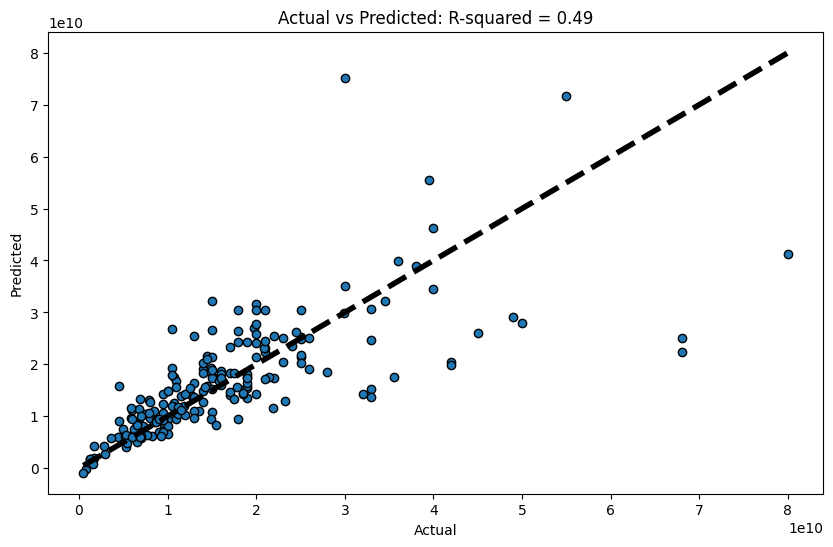

,Metric,Linear Regression
0,R-squared,4.850534e-01
1,MAE,4.993783e+09


In [ ]:
# Memisahkan fitur dan target untuk data yang sudah dinormalisasi
X_train_normalized = train_df_normalized.drop(columns=['Harga'])
y_train_normalized = train_df_normalized['Harga']
X_test_normalized = test_df_normalized.drop(columns=['Harga'])
y_test_normalized = test_df_normalized['Harga']

# Melatih model regresi linear dengan data yang sudah dinormalisasi
model_normalized = LinearRegression()
model_normalized.fit(X_train_normalized, y_train_normalized)

# Memprediksi nilai harga rumah menggunakan data uji yang sudah dinormalisasi
y_pred_normalized = model_normalized.predict(X_test_normalized)


# Menghitung metrik evaluasi
r_squared_normalized = r2_score(y_test_normalized, y_pred_normalized)
mae_normalized = mean_absolute_error(y_test_normalized, y_pred_normalized)

# Visualisasi R-squared
plt.figure(figsize=(10, 6))
plt.scatter(y_test_normalized, y_pred_normalized, edgecolors=(0, 0, 0))
plt.plot([y_test_normalized.min(), y_test_normalized.max()], [y_test_normalized.min(), y_test_normalized.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted: R-squared = {:.2f}'.format(r_squared_normalized))

plt.show()

# Membuat DataFrame untuk hasil metrik evaluasi
results_normalized = pd.DataFrame({
    'Metric': ['R-squared', 'MAE'],
    'Linear Regression': [r_squared_normalized, mae_normalized]
})

results_normalized

### **Desicion Tree Regressor**

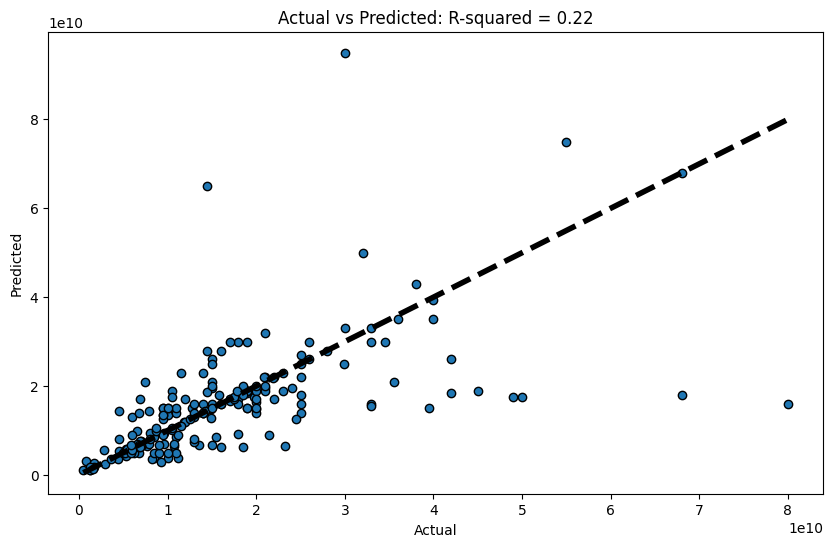

,Metric,Decision Tree Regressor (Normalized)
0,R-squared,2.158340e-01
1,MAE,5.330448e+09


In [ ]:
# Memisahkan fitur dan target untuk data yang sudah dinormalisasi
X_train_normalized = train_df_normalized.drop(columns=['Harga'])
y_train_normalized = train_df_normalized['Harga']
X_test_normalized = test_df_normalized.drop(columns=['Harga'])
y_test_normalized = test_df_normalized['Harga']

# Melatih model Decision Tree Regressor dengan data yang sudah dinormalisasi
dt_regressor_normalized = DecisionTreeRegressor(random_state=42)
dt_regressor_normalized.fit(X_train_normalized, y_train_normalized)

# Memprediksi nilai harga rumah menggunakan data uji yang sudah dinormalisasi
y_pred_dt_normalized = dt_regressor_normalized.predict(X_test_normalized)

# Menghitung metrik evaluasi tanpa klasifikasi
r_squared_dt_normalized = r2_score(y_test_normalized, y_pred_dt_normalized)
mae_dt_normalized = mean_absolute_error(y_test_normalized, y_pred_dt_normalized)

# Visualisasi R-squared
plt.figure(figsize=(10, 6))
plt.scatter(y_test_normalized, y_pred_dt_normalized, edgecolors=(0, 0, 0))
plt.plot([y_test_normalized.min(), y_test_normalized.max()], [y_test_normalized.min(), y_test_normalized.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted: R-squared = {:.2f}'.format(r_squared_dt_normalized))

plt.show()

# Membuat DataFrame untuk hasil metrik evaluasi
results_dt_regressor_normalized = pd.DataFrame({
    'Metric': ['R-squared', 'MAE'],
    'Decision Tree Regressor (Normalized)': [r_squared_dt_normalized, mae_dt_normalized]
})

results_dt_regressor_normalized

### **Random Forest Regressor**

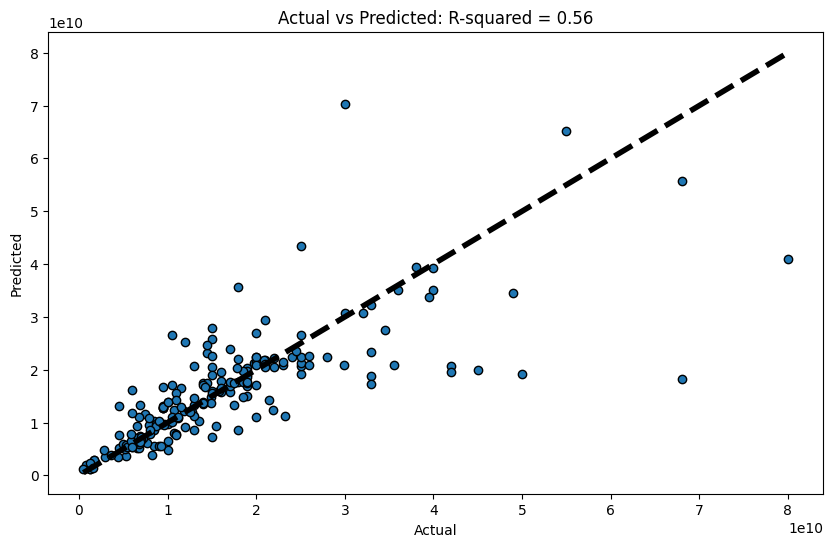

,Metric,Random Forest Regressor (Normalized)
0,R-squared,5.624193e-01
1,MAE,4.297684e+09


In [ ]:
# Memisahkan fitur dan target untuk data yang sudah dinormalisasi
X_train_normalized = train_df_normalized.drop(columns=['Harga'])
y_train_normalized = train_df_normalized['Harga']
X_test_normalized = test_df_normalized.drop(columns=['Harga'])
y_test_normalized = test_df_normalized['Harga']

# Melatih model Random Forest Regressor dengan data yang sudah dinormalisasi
rf_regressor_normalized = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor_normalized.fit(X_train_normalized, y_train_normalized)

# Memprediksi nilai harga rumah menggunakan data uji yang sudah dinormalisasi
y_pred_rf_normalized = rf_regressor_normalized.predict(X_test_normalized)

# Menghitung metrik evaluasi tanpa klasifikasi
r_squared_rf_normalized = r2_score(y_test_normalized, y_pred_rf_normalized)
mae_rf_normalized = mean_absolute_error(y_test_normalized, y_pred_rf_normalized)

# Visualisasi R-squared
plt.figure(figsize=(10, 6))
plt.scatter(y_test_normalized, y_pred_rf_normalized, edgecolors=(0, 0, 0))
plt.plot([y_test_normalized.min(), y_test_normalized.max()], [y_test_normalized.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted: R-squared = {:.2f}'.format(r_squared_rf_normalized))

plt.show()

# Membuat DataFrame untuk hasil metrik evaluasi
results_rf_regressor_normalized = pd.DataFrame({
    'Metric': ['R-squared', 'MAE'],
    'Random Forest Regressor (Normalized)': [r_squared_rf_normalized, mae_rf_normalized]
})

results_rf_regressor_normalized

### **KNN Regressor**

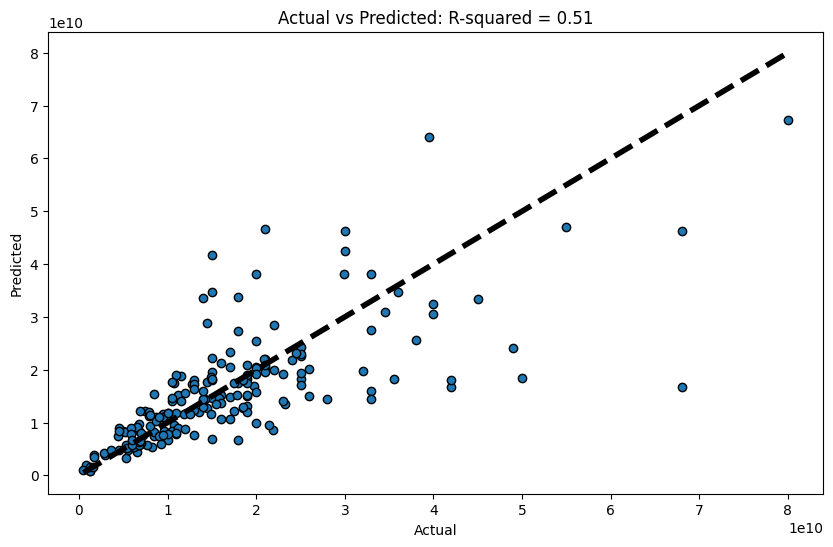

,Metric,KNN Regressor (Normalized)
0,R-squared,5.132869e-01
1,MAE,5.112164e+09


In [ ]:
# Memisahkan fitur dan target untuk data yang sudah dinormalisasi
X_train_normalized = train_df_normalized.drop(columns=['Harga'])
y_train_normalized = train_df_normalized['Harga']
X_test_normalized = test_df_normalized.drop(columns=['Harga'])
y_test_normalized = test_df_normalized['Harga']

# Melatih model KNN Regressor dengan data yang sudah dinormalisasi
knn_regressor_normalized = KNeighborsRegressor(n_neighbors=5)
knn_regressor_normalized.fit(X_train_normalized, y_train_normalized)

# Memprediksi nilai harga rumah menggunakan data uji yang sudah dinormalisasi
y_pred_knn_normalized = knn_regressor_normalized.predict(X_test_normalized)

# Menghitung metrik evaluasi tanpa klasifikasi
r_squared_knn_normalized = r2_score(y_test_normalized, y_pred_knn_normalized)
mae_knn_normalized = mean_absolute_error(y_test_normalized, y_pred_knn_normalized)

# Visualisasi R-squared
plt.figure(figsize=(10, 6))
plt.scatter(y_test_normalized, y_pred_knn_normalized, edgecolors=(0, 0, 0))
plt.plot([y_test_normalized.min(), y_test_normalized.max()], [y_test_normalized.min(), y_test_normalized.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted: R-squared = {:.2f}'.format(r_squared_knn_normalized))

plt.show()

# Membuat DataFrame untuk hasil metrik evaluasi
results_knn_regressor_normalized = pd.DataFrame({
    'Metric': ['R-squared', 'MAE'],
    'KNN Regressor (Normalized)': [r_squared_knn_normalized, mae_knn_normalized]
})

results_knn_regressor_normalized

## **Perbandingan Evaluasi tiap Model**

<Figure size 1200x600 with 0 Axes>

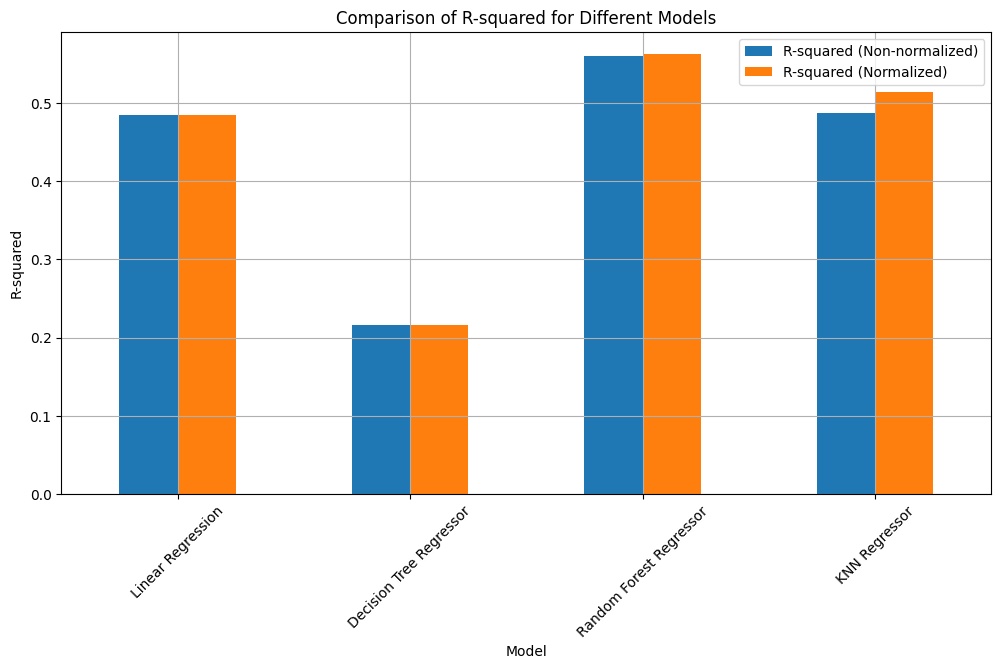

<Figure size 1200x600 with 0 Axes>

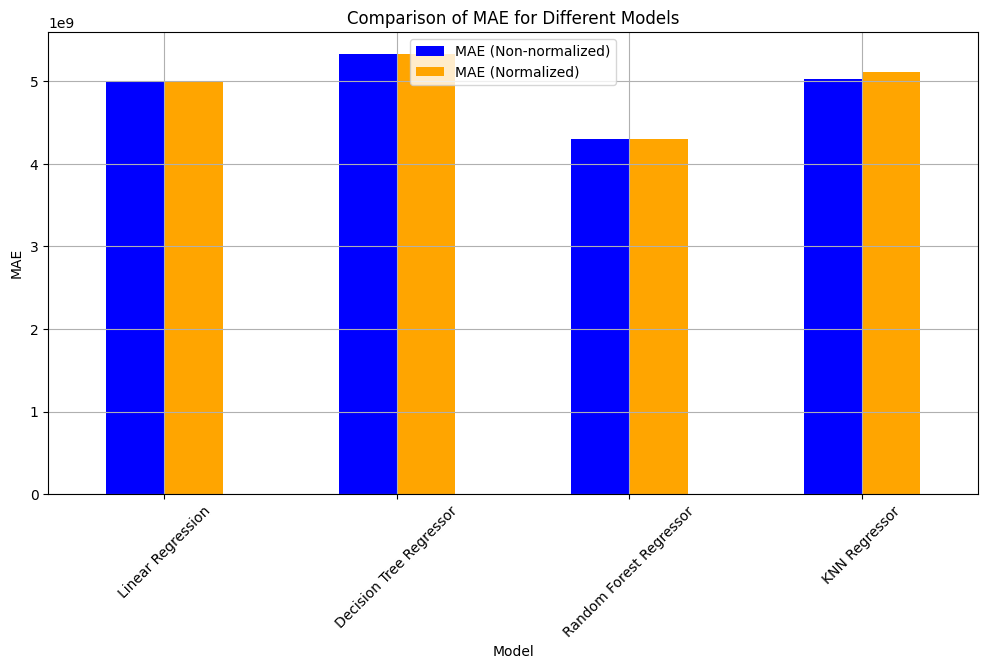

In [ ]:
# Dataframe untuk menyimpan hasil evaluasi
results_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'KNN Regressor'],
    'R-squared (Non-normalized)': [r_squared, r_squared_dt, r_squared_rf, r_squared_knn],
    'MAE (Non-normalized)': [mae, mae_dt, mae_rf, mae_knn],
    'R-squared (Normalized)': [r_squared_normalized, r_squared_dt_normalized, r_squared_rf_normalized, r_squared_knn_normalized],
    'MAE (Normalized)': [mae_normalized, mae_dt_normalized, mae_rf_normalized, mae_knn_normalized]
})

# Plot untuk perbandingan R-squared
plt.figure(figsize=(12, 6))
results_comparison.plot(kind='bar', x='Model', y=['R-squared (Non-normalized)', 'R-squared (Normalized)'], figsize=(12, 6))
plt.title('Comparison of R-squared for Different Models')
plt.ylabel('R-squared')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot untuk perbandingan MAE
plt.figure(figsize=(12, 6))
results_comparison.plot(kind='bar', x='Model', y=['MAE (Non-normalized)', 'MAE (Normalized)'], figsize=(12, 6), color=['blue', 'orange'])
plt.title('Comparison of MAE for Different Models')
plt.ylabel('MAE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()